### RFM(Recency, Frequency and Monetary) is an analysis technique used in marketing analytics 
### In this notebook I will build an ML model to perform RFM analysis and 
### segment customers based on their RFM score

In [25]:
# Import libraries
import pandas as pd
import datetime as dt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
# import plotly.express as px
# import plotly.io as pio
# import plotly.graph_objects as go
# pio.templates.default = "plotly_white"

In [49]:
# Load dataset
data = pd.read_csv('rfm_data.csv')
data.head()
data.shape

(1000, 6)

In [27]:
# Calculate Recency score
data['PurchaseDate'] = pd.to_datetime(data['PurchaseDate'])

In [28]:
today = max(data['PurchaseDate'])
rfm_data = data.groupby('CustomerID').agg({
    'PurchaseDate': lambda x: (today - x.max()).days,  # Recency
    'TransactionAmount': ['count', 'sum']  # Frequency and Monetary
}).reset_index()
rfm_data.columns = ['Customer ID', 'Recency', 'Frequency', 'Monetary']

In [29]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(rfm_data[['Recency', 'Frequency', 'Monetary']])


In [30]:
# Kmeans_Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
rfm_data['Cluster'] = kmeans.fit_predict(scaled_data)


/Users/sarah/Data-Science/env/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [43]:
# High-Value Customers
high_value_customers = rfm_data[rfm_data['Cluster'] == 0]
# At-Risk Customers
at_risk_customers = rfm_data[rfm_data['Cluster'] == 1]
# Potential Opportunities
potential_opportunities = rfm_data[rfm_data['Cluster'] == 2]

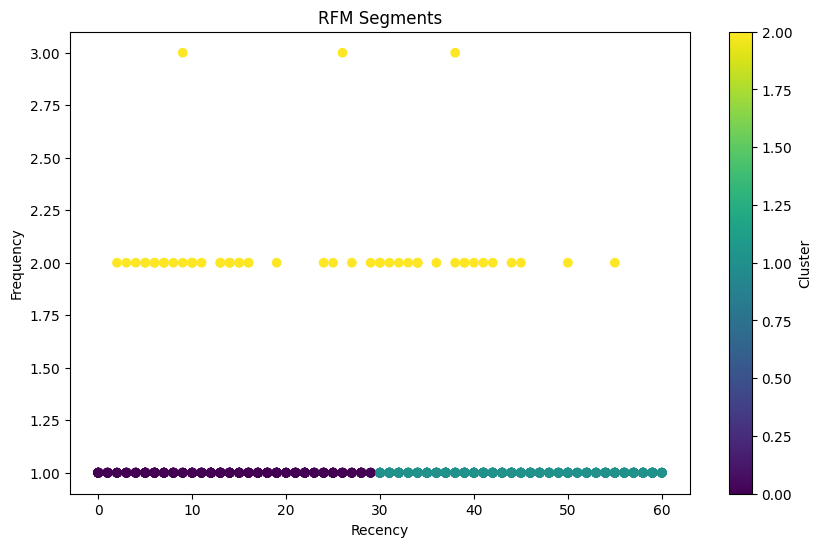

In [44]:
import matplotlib.pyplot as plt
# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(rfm_data['Recency'], rfm_data['Frequency'], c=rfm_data['Cluster'], cmap='viridis')
plt.xlabel('Recency')
plt.ylabel('Frequency')
plt.title('RFM Segments')
plt.colorbar(label='Cluster')
plt.show()

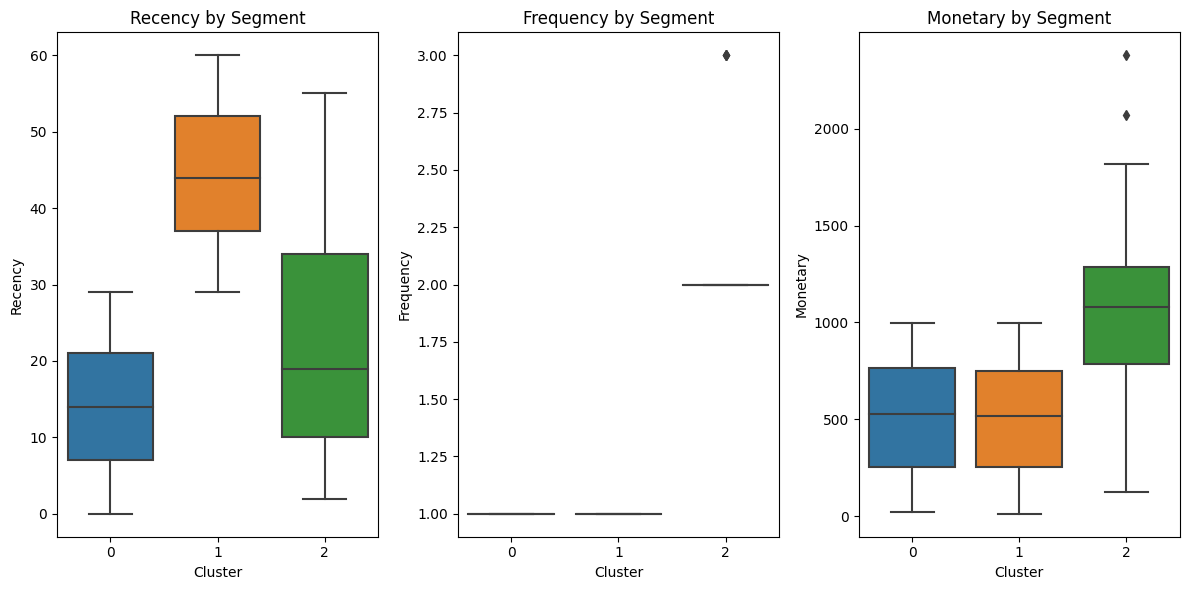

In [46]:
import seaborn as sns
# Box plots for RFM scores by segment
plt.figure(figsize=(12, 6))
plt.subplot(131)
sns.boxplot(x='Cluster', y='Recency', data=rfm_data)
plt.title('Recency by Segment')
plt.subplot(132)
sns.boxplot(x='Cluster', y='Frequency', data=rfm_data)
plt.title('Frequency by Segment')
plt.subplot(133)
sns.boxplot(x='Cluster', y='Monetary', data=rfm_data)
plt.title('Monetary by Segment')
plt.tight_layout()
plt.show()


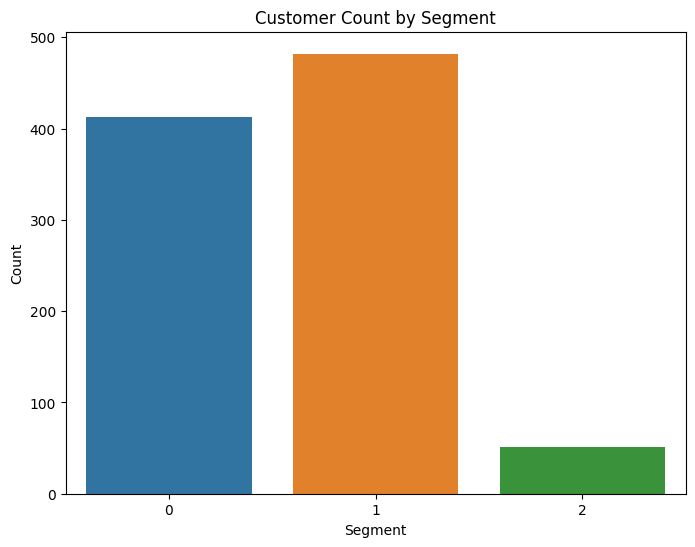

In [47]:
# Countplot of segment sizes
plt.figure(figsize=(8, 6))
sns.countplot(x='Cluster', data=rfm_data)
plt.xlabel('Segment')
plt.ylabel('Count')
plt.title('Customer Count by Segment')
plt.show()
